# Exercise 1

白日依山尽，黃河入海流；欲穷千里目，更上一层楼。

This is a famous Chinese poem written during the Tang Dynasty. To truly appreciate it, use the API offered by OpenAI to:

(1) translate it into English and display the translation,

(2) explain its meaning in English in at most 50 words and display the explanation,

(3) generate an audio file in which the poem is recited in its original language, and then it is explained in English.

You can use the code below as your starting point:

### Setup

First, make the necessary imports.

In [ ]:
!pip install openai

from google.colab import userdata
import os
from pathlib import Path
from openai import OpenAI
import IPython.display as ipd
import getpass
from PIL import Image
import urllib.request
from IPython.display import Markdown

Then, assign the API key for OpenAI.

When working with sensitive information like API keys or passwords in Google Colab, it's crucial to handle data securely. As you learnt in the tutorial session, two common approaches for this are using Colab's Secrets Manager, which stores and retrieves secrets without exposing them in the notebook, and `getpass`, a Python function that securely prompts users to input secrets during runtime without showing them. Both methods help ensure your sensitive data remains protected.


In [ ]:
#When using Colab Secret Manager
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
#When using getpass
#os.environ['OPENAI_API_KEY'] = getpass.getpass()

client = OpenAI()

### Step 1. Translation and Explanation Using OpenAI Chat Completions API

This is your starting point, with the original poem in `original_text`.

In [ ]:
originalText = '白日依山尽，黃河入海流；欲穷千里目，更上一层楼。'

Define a function `translateFromChineseToEnglish` that uses the Chat Completions API with `gpt-4o` as the model to translate from Chinese to English.

**Hint:** first, use a developer message to instruct the model that you will provide it a poem in Chinese and you want it to be translated into English; then, use a user message to pass the poem as parameter.

In [30]:
# Use the Chat Completions API to translate the poem
def translateFromChineseToEnglish(text):
  ## YOUR CODE (START)
  response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "developer",
      "content": "You will be provided with a poem in Chinese, and your task is to translate it into English."
    },
    {
      "role": "user",
      "content": text
    }
  ],
  temperature=0.7,
  max_tokens=64,
  )
  ## YOUR CODE (END)
  return response.choices[0].message.content

Define a function `explainMeaning` that uses the Chat Completions API with `gpt-4o` as the model to the meaning of the poem.

**Hint:** first, use a developer message to instruct the model that you will provide it the English translation of a Chinese poem and you want it to be explained in max. 50 words; then, use a user message to pass the translated poem as parameter.

In [31]:
# Use Chat Completions API to explain the meaning of the poem
def explainMeaning(text):
  ## YOUR CODE (START)
  response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "developer",
      "content": "You will be provided the English translation of a Chinese poem. Explain the meaning of the poem in no more than 50 words."
    },
    {
      "role": "user",
      "content": text
    }
  ],
  temperature=0.7,
  max_tokens=64
  )
  ## YOUR CODE (END)
  return response.choices[0].message.content

Now that the two functions are defined, you can call them to obtain and display the translation and the explanation of the poem.

In [32]:
# Call function translateFromChineseToEnglish to obtain the translation
translatedText = translateFromChineseToEnglish(originalText)

# Call function explainMeaning to obtain the explanation
explainedText = explainMeaning(translatedText)

# Display the translation and the explanation
display(Markdown(translatedText))
display(Markdown(explainedText))

The white sun sets behind the mountains, the Yellow River flows into the sea;  
To fully appreciate the vast scenery, one must climb another floor.

The poem emphasizes the need for greater perspective to appreciate the full beauty of the world. As the sun sets and the river flows, it suggests that by elevating oneself, either physically or metaphorically, one can gain a broader, more complete understanding of life's vastness.

### Step 2. Speech Generation Using OpenAI Audio API

Define a function `generateTextToSpeech` to generate an audio file `speech.mp3` using the Audio API with `tts-1` as the model and `alloy` as the voice.

In [ ]:
# Use the Audio API to generate text to speech
def generateTextToSpeech(text):
  speech_file_path = "speech.mp3"
  ## YOUR CODE (START)
  response = client.audio.speech.create(
    model="tts-1",
    voice="alloy",
    input=text
  )
  response.stream_to_file(speech_file_path)
  ## YOUR CODE (END)
  return speech_file_path

Now that the function is defined, call it passing the original poem text in Chinese and the explanation in English.

In [ ]:
# Call the generateTextToSpeech function to obtain the audio
fileName = generateTextToSpeech(originalText + explainedText)

# Present the audio file
ipd.Audio(filename=fileName)

### Step 3. Image Generation Using OpenAI Images API

Using the Images API with `DALL-E-3` as the model, define a function `generatePoemImage` to generate a 1024x1024 image.

In [ ]:
## use the Images API with dall-e-3 to generate and image based on the poem
def generatePoemImage(prompt):
  ## YOUR CODE (START)
  response = client.images.generate(
    model="dall-e-3",
    prompt=prompt,
    size="1024x1024",
    quality="standard",
    n=1,
  )
  ## YOUR CODE (END)
  return response.data[0].url

Now that the function is defined, call it passing as parameter the English translation of the poem.

In [ ]:
# Call the generatePoemImage function to generate the image
poem_Image_Uri = generatePoemImage(translatedText)

Open and display the image that is stored at `poem_Image_Uri`.

In [ ]:
# Open the image given its URL
## YOUR CODE (START)
with urllib.request.urlopen(poem_Image_Uri) as url:
    img=Image.open(url)
    display(img)
## YOUR CODE (END)

# Exercise 2

In this exercise, you will get inspiration for cooking dinner based on the ingredients at your disposal in the fridge.

(1) You will first analyze a picture of the fridge, then

(2) use the Chat Completions API to generate a recipe and

(3) a name for the dish, and finally

(4) you will use Dall-E-3 to generate a picture of the dish.

To accomplish this, you can expand the code provided below:

### Setup

First, make the necessary imports.

In [ ]:
!pip install openai

from google.colab import userdata
import os
from pathlib import Path
from openai import OpenAI
import IPython.display as ipd
import getpass
from PIL import Image
import urllib.request
from IPython.display import Markdown

Then, assign the API key for OpenAI.

In [ ]:
#When using Colab Secret Manager
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
#When using getpass
#os.environ['OPENAI_API_KEY'] = getpass.getpass()

client = OpenAI()

This is your starting point, with a picture of the fridge contents specified in a URI.

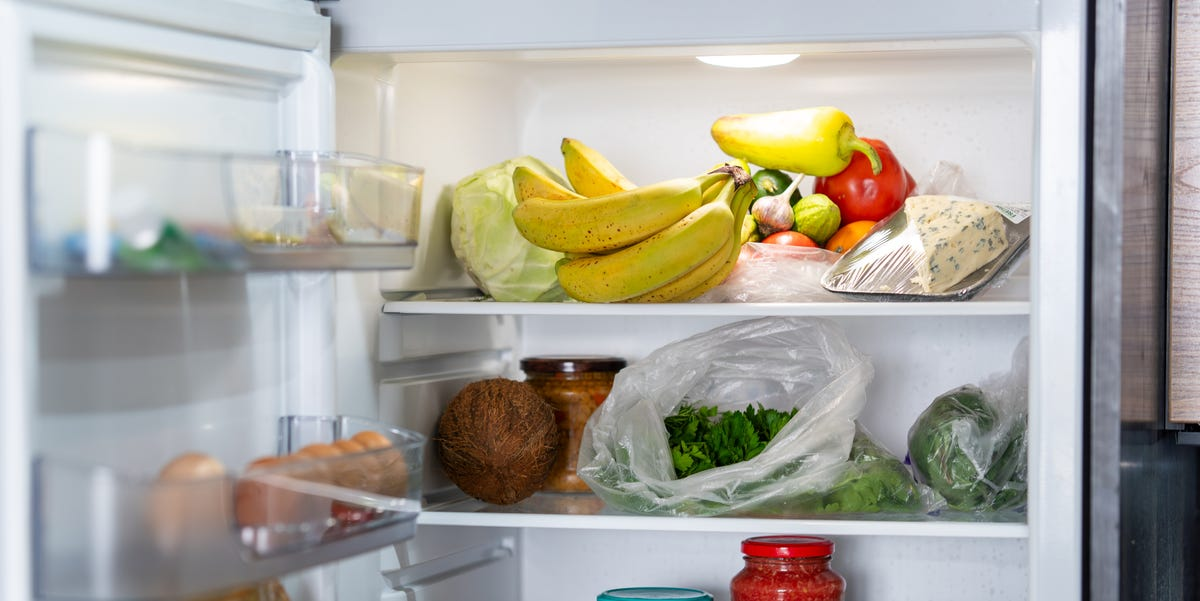

In [33]:
uri = 'https://hips.hearstapps.com/hmg-prod/images/open-refrigerator-filled-with-fresh-fruits-and-royalty-free-image-1727120488.jpg?crop=1.00xw:0.752xh;0,0&resize=1200:*'
with urllib.request.urlopen(uri) as url:
    img=Image.open(url)
    display(img)

### Step 1. Using Chat Completions API to Identify Ingredients

Define a function that uses the Chat Completions API with `gpt-4o` as the model for listing the ingredients visible in the picture at the specified URI.

In [34]:
# Add your code to list the ingredients visible in the picture at the specified URI.
def listIngredients(uri):
  ## YOUR CODE (START)
  response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
      {
        "role": "user",
        "content": [
          {"type": "text", "text": "List the ingredients visible in this image."},
          {
            "type": "image_url",
            "image_url": {
              "url": uri,
            },
          },
        ],
      }
    ],
    max_tokens=300,
  )
  ## YOUR CODE (END)
  return response.choices[0].message.content

Now that the function is defined, call it to obtain the list of available ingredients into a variable `ingredients`.

In [35]:
#Call the listIngredients function to get the ingredients
ingredients = listIngredients(uri)

# Display the ingredients
display(Markdown(ingredients))

The image shows the following ingredients in the refrigerator:

1. Bananas
2. Cabbage
3. Red bell pepper
4. Yellow bell pepper
5. Cheese (looks like it could be blue cheese)
6. Tomatoes
7. Coconut
8. Jar of preserves or sauce
9. Parsley or similar leafy herb
10. Eggs
11. Pickle jar or similar jar
12. Green leafy vegetable (possibly lettuce or spinach)

### Step 2. Using Chat Completions API to Create Recipe

Next, prompt the Chat Completions API to create a recipe based on the ingredients. Use `gpt-4o-mini` as model.

**Hint:** first use a developer message to instruct the model to behave like a professional chef, and that using only the following list of ingredients it should create a step-by-step recipe; then, use a user message to pass the list of ingredients.

In [36]:
# Add your code to create a recipe based on the ingredients
def createRecipe(ingredients):
  ## YOUR CODE (START)
  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
      {"role": "developer", "content": "You are a professional chef. Using only the following list of ingredients, you should create a dish. Provide a step by step recipe."},
      {"role": "user", "content": ingredients},
    ],
    temperature=1.2
  )
  ## YOUR CODE (END)
  return response.choices[0].message.content

Now that the function is defined, call it passing `ingredients` as parameter and display the resulting recipe.

In [37]:
# Call the createRecipe function to get the recipe
recipe = createRecipe(ingredients)

# Display the recipe
display(Markdown(recipe))

Based on the ingredients you have available, we can create a delightful Coconut & Cabbage Salad with Eggs and a Tangy Tomato-Bell Pepper Dressing. Here's a step-by-step recipe:

### Coconut & Cabbage Salad with Eggs and Tangy Dressing

#### Ingredients:
- 1/4 head of cabbage, thinly sliced
- 1 red bell pepper, finely chopped
- 1 yellow bell pepper, finely chopped
- 1-2 tomatoes, diced
- 1 ripe banana, sliced
- 1/4 cup coconut flakes (fresh or dried)
- 1/4 cup blue cheese (crumbled)
- 2-3 eggs
- 1/4 cup of preserves or sauce (preferably tangy)
- A handful of parsley or similar leafy herb, chopped
- Green leafy vegetable (lettuce or spinach), torn into pieces
- Salt and pepper to taste
- Pickles, chopped (for garnish)

### Instructions:

1. **Prepare the Eggs:**
   - Place the eggs in a pot and cover them with water. Bring to a boil, then lower the heat to a simmer for about 10-12 minutes for hard-boiled eggs.
   - Once cooked, remove the eggs, let them cool, and then peel them. Slice the eggs and set them aside.

2. **Prepare the Veggies:**
   - In a large bow, combine the thinly sliced cabbage, chopped red and yellow bell peppers, and diced tomatoes.
   - Add in the torn green leafy vegetables (lettuce or spinach) and mix gently.

3. **Make the Tangy Dressing:**
   - In a small bowl, combine the jar of preserves or sauce with a bit of salt and pepper. If you prefer, you can add a splash of any vinegar or lemon juice, if available, for extra tanginess. Mix well until smooth.

4. **Assemble the Salad:**
   - Pour the tangy dressing over the vegetable mixture and toss to coat everything evenly.
   - Add the coconut flakes and gently mix them in.

5. **Add Eggs and Cheese:**
   - Top the salad with the sliced hard-boiled eggs and the crumbled blue cheese. You can either keep the cheese on top for presentation or mix it into the salad for a more integrated flavor.

6. **Garnish and Serve:**
   - Finish by adding the sliced bananas to add a sweet contrast to the dish.
   - Optional: Add chopped pickles over the top for an extra crunchy and tangy layer.
   - Chop fresh parsley or any leafy herb and sprinkle over the salad for brightness and additional flavor.

7. **Enjoy:**
   - Serve the salad chilled or at room temperature as a main dish or a light side dish. It’s packed with flavors and textures that complement each other beautifully!

This recipe leverages both the freshness from the vegetables and the indulgence of blue cheese, along with the sweetness from bananas, creating a balanced composition. Enjoy your cooking!

### Step 3. Using Chat Completions API to Generate Dish Name

Now use again the Chat Completions API along with the `gpt-4o-mini` model to generate a name for the dish.

**Hint:** use a developer message to instruct the model what to do; then use a user message to pass the recipe.

In [ ]:
# Add your code here to generate a name for the dish
def generateDishName(recipe):
  ## YOUR CODE (START)
  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
      {"role": "developer", "content": "What do you call this dish? Be creative with the name."},
      {"role": "user", "content": recipe}
    ],
    temperature=0.9
  )
  ## YOUR CODE (END)
  dishName = response.choices[0].message.content
  return dishName

Now that the function is defined, call it passing `recipe` as parameter to obtain the dish name.

In [ ]:
# Call the generateDishName function to get the dish name
dishName = generateDishName(recipe)

# Display the dish name
display(Markdown(dishName))

### Step 4. Image Generation Using OpenAI Images API

Now use the OpenAI Images API with `dall-e-3` as the model to create an image using the name of the dish as prompt.

In [ ]:
# Add your code here to generate an image using the Images API with Dall-E-3 based on the prompt
def generateDishImage(prompt):
  ## YOUR CODE (START)
  response = client.images.generate(
    model="dall-e-3",
    prompt=prompt,
    size="1024x1024",
    quality="standard",
    n=1,
  )
  ## YOUR CODE (END)
  return response.data[0].url

Now that the function is defined, call it to generate the dish image.

In [ ]:
# Call the generateDishImage function to generate the image
dish_Image_Uri = generateDishImage(dishName)

Finally, display the image of the dish given its URL.

In [ ]:
# Add your code here to display the image
## YOUR CODE (START)
with urllib.request.urlopen(dish_Image_Uri) as url:
    img=Image.open(url)
    display(img)
## YOUR CODE (END)